In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [7]:
# zipcodes = gpd.read_file('../data/zipcodes.geojson')
# print(zipcodes.crs)
# zipcodes.head( )

metro=gpd.read_file('../self_project/Louisville_Metro_KY_County_Boundaries.geojson')
print(metro.crs)
metro.head()



EPSG:4326


,OBJECTID,CNTY_NAME,FIPS,STATE_FIPS,CNTY_FIPS,SHAPEAREA,SHAPELEN,geometry
0,1,TRIMBLE,21223,21,223,4.349564e+09,294807.539172,"POLYGON ((-85.33096 38.72978, -85.33314 38.735..."
1,2,CLARK,18019,18,019,1.050504e+10,547004.159979,"POLYGON ((-85.75428 38.60559, -85.75612 38.605..."
2,3,HENRY,21103,21,103,8.110028e+09,465608.160665,"POLYGON ((-85.16846 38.58525, -85.19357 38.566..."
3,4,OLDHAM,21185,21,185,5.471457e+09,339914.762002,"POLYGON ((-85.42896 38.51958, -85.43273 38.524..."
4,5,HARRISON,18061,18,061,1.354932e+10,625174.893133,"POLYGON ((-86.25502 38.42255, -86.25515 38.422..."


In [11]:
type(metro)

geopandas.geodataframe.GeoDataFrame

<Axes: >

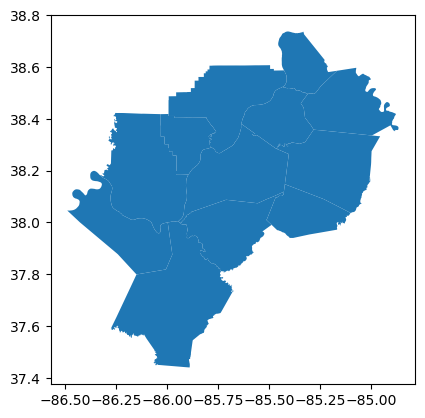

In [9]:
metro.plot()

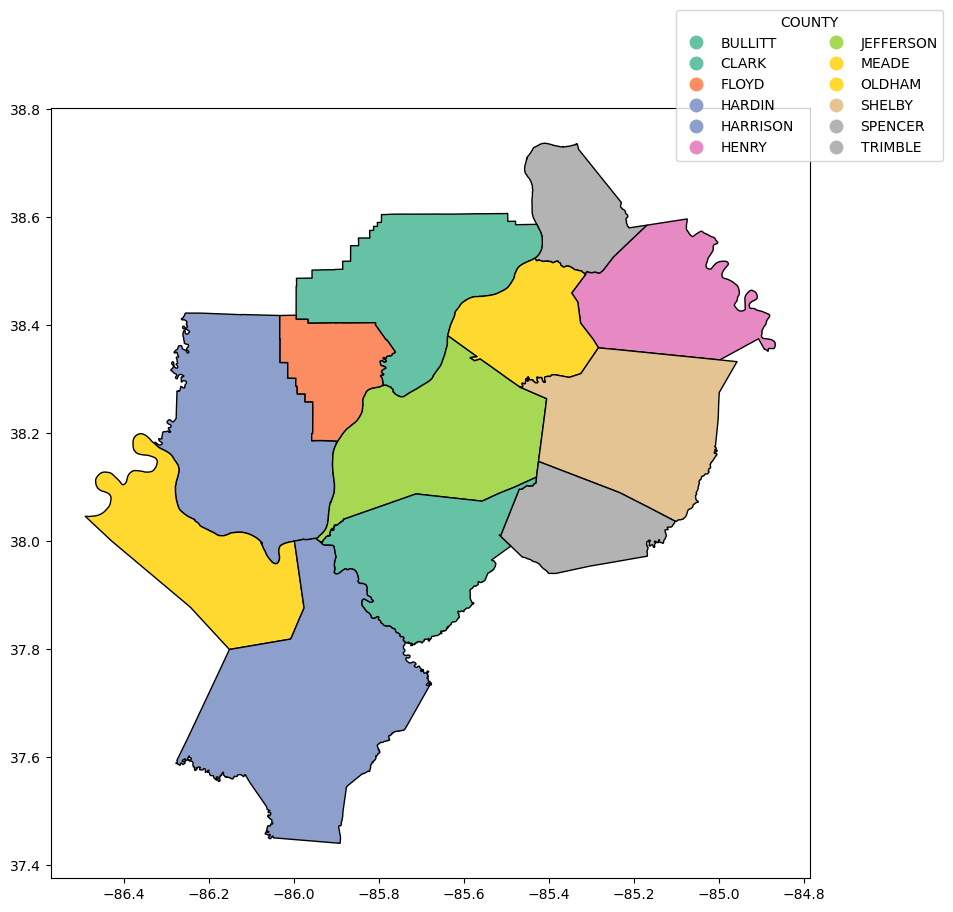

In [33]:
leg_kwds = {'title': 'COUNTY', 'loc': 'center', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

metro.plot(column = 'CNTY_NAME', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [39]:
# bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
# print(bus_stops.shape)
# bus_stops.head(3)

starbucks=pd.read_csv('../self_project/starbucks_locations.csv')
print(starbucks.shape)
starbucks.head()


(40, 12)


,Store ID,Name,Store Number,Phone Number,Ownership Type,Street Combined,City,Country Subdivision,Country,Postal Code,Latitude,Longitude
0,7106,Mall St. Matthews,10637-101450,502-259-9591,CO,"5000 Shelbyville Road, 1527, Mall St. Matthews",Louisville,KY,US,40207,38.248829,-85.623650
1,7274,Jefferson Mall,10454-100813,502-969-0922,CO,"4801-302 Outer Loop, PK120, Jefferson Mall",Louisville,KY,US,40219,38.141613,-85.671799
2,7316,Bardstown & Heather,9982-99152,502-454-6365,CO,3401 Bardstown Road,Louisville,KY,US,40218,38.205608,-85.666222
3,8120,Kroger - Louisville #764,79277-97100,502-425-0065,LS,9501 Westport Road,Louisville,KY,US,40241,38.288235,-85.574341
4,8440,Crestview Hills,9562-96854,859-426-5254,CO,2871 Dixie Highway,Crestview Hills,KY,US,41017,39.024803,-84.579216


In [53]:
star_geo = gpd.GeoDataFrame(starbucks, 
                           crs = metro.crs, 
                           geometry = gpd.points_from_xy(starbucks.Longitude, starbucks.Latitude))

In [51]:
type(star_geo)

geopandas.geodataframe.GeoDataFrame

In [101]:
metro = metro[['CNTY_NAME', 'CNTY_FIPS', 'geometry']]

In [103]:
star_location = gpd.sjoin(star_geo, metro, predicate = 'within')

In [105]:
star_location.head()

,Store ID,Name,Store Number,Phone Number,Ownership Type,Street Combined,City,Country Subdivision,Country,Postal Code,Latitude,Longitude,geometry,index_right,CNTY_NAME,CNTY_FIPS
0,7106,Mall St. Matthews,10637-101450,502-259-9591,CO,"5000 Shelbyville Road, 1527, Mall St. Matthews",Louisville,KY,US,40207,38.248829,-85.623650,POINT (-85.62365 38.24883),6,JEFFERSON,111
1,7274,Jefferson Mall,10454-100813,502-969-0922,CO,"4801-302 Outer Loop, PK120, Jefferson Mall",Louisville,KY,US,40219,38.141613,-85.671799,POINT (-85.6718 38.14161),6,JEFFERSON,111
2,7316,Bardstown & Heather,9982-99152,502-454-6365,CO,3401 Bardstown Road,Louisville,KY,US,40218,38.205608,-85.666222,POINT (-85.66622 38.20561),6,JEFFERSON,111
3,8120,Kroger - Louisville #764,79277-97100,502-425-0065,LS,9501 Westport Road,Louisville,KY,US,40241,38.288235,-85.574341,POINT (-85.57434 38.28823),6,JEFFERSON,111
5,8537,Taylorsville & I-265,10595-99741,502-263-7135,CO,"12605 Taylorsville Road, Tyler Center Shopping...",Louisville,KY,US,40299,38.187904,-85.519257,POINT (-85.51926 38.1879),6,JEFFERSON,111


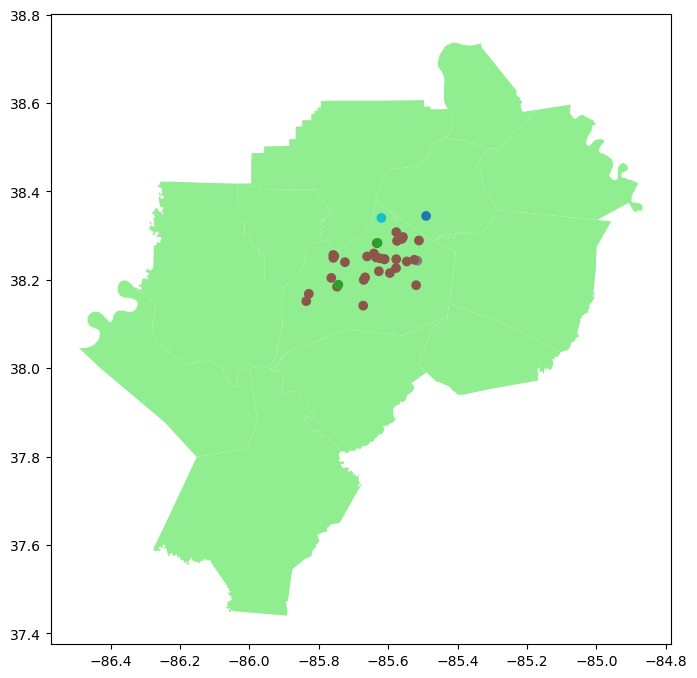

In [135]:
ax = metro.plot(figsize = (8, 10), color = 'lightgreen')
star_location.plot( ax = ax, column = 'City');
plt.show();

In [137]:
center= metro.geometry.centroid[11]
print(center)

POINT (-85.96355532232113 37.697767213857674)


C:\Users\khare\AppData\Local\Temp\ipykernel_39108\3275067043.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center= metro.geometry.centroid[11]


In [139]:
area_center = [center.y, center.x]

In [141]:
print(area_center)

[37.697767213857674, -85.96355532232113]


In [143]:
i = 0
for row_index, row_values in star_location.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
Store ID                                                         7106
Name                                                Mall St. Matthews
Store Number                                             10637-101450
Phone Number                                             502-259-9591
Ownership Type                                                     CO
Street Combined        5000 Shelbyville Road, 1527, Mall St. Matthews
City                                                       Louisville
Country Subdivision                                                KY
Country                                                            US
Postal Code                                                     40207
Latitude                                                    38.248829
Longitude                                                   -85.62365
geometry                              POINT (-85.6236496 38.24882889)
index_right                                                      

In [161]:
map_37 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(star_location).add_to(map_37207)

In [165]:
for row_index, row_values in star_location.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['City'])
    icon=folium.Icon(color="blue",icon="coffee", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37)
map_37.save('../maps/map37.html')

#display our map
map_37

In [181]:
cluster_map_37 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37)

folium.GeoJson(star_location).add_to(cluster_map_37)

# inside the loop add each marker to the cluster
for row_index, row_values in star_location.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['City'])
    icon=folium.Icon(color="blue",icon="coffee", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37.save('../maps/cluster37.html')

cluster_map_37  